Name: Rishav Khatiwada

Uni_id: 2226139

Final Portfolio: Logistic Regression

In [442]:
# Necessary imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [443]:
# Connectiong to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [444]:

path_datasets = "/content/drive/MyDrive/9.csv"

In [477]:
df = pd.read_csv(path_datasets)

Data Understanding:


In [446]:
# first 5 data of dataset
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Urban,186.21,29.0,formerly smoked,1


In [447]:
# Information of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5069 entries, 0 to 5068
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5069 non-null   object 
 1   age                5069 non-null   float64
 2   hypertension       5069 non-null   int64  
 3   heart_disease      5069 non-null   int64  
 4   ever_married       5069 non-null   object 
 5   Residence_type     5069 non-null   object 
 6   avg_glucose_level  5069 non-null   float64
 7   bmi                5069 non-null   float64
 8   smoking_status     5069 non-null   object 
 9   stroke             5069 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 396.1+ KB


In [448]:
# Mean, Median, Mode, q1,q2,q3,Max value, min Value
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000,5069.000000
mean,43.083914,0.097061,0.053265,106.010343,28.952117,0.042809
std,22.583033,0.296069,0.224583,45.128178,8.394409,0.202447
min,0.080000,0.000000,0.000000,55.120000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.260000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.020000,33.300000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [449]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [450]:
df.shape

(5069, 10)

In [452]:
# Splitting the data into independent variale  as X  and dependent variables as the Y   
X = df[["bmi","age","avg_glucose_level"]]
Y = df["stroke"]

In [453]:
X

,bmi,age,avg_glucose_level
0,36.6,67.0,228.69
1,32.5,80.0,105.92
2,34.4,49.0,171.23
3,24.0,79.0,174.12
4,29.0,81.0,186.21
...,...,...,...
5064,18.6,13.0,103.08
5065,40.0,81.0,125.20
5066,30.6,35.0,82.99
5067,25.6,51.0,166.29


In [454]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5064    0
5065    0
5066    0
5067    0
5068    0
Name: stroke, Length: 5069, dtype: int64

Finding the co-relation between the independent and dependent variable

In [455]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276276,0.262815,0.238723,0.305333,0.234257
hypertension,0.276276,1.000000,0.109185,0.180079,0.168066,0.134767
heart_disease,0.262815,0.109185,1.000000,0.159868,0.058512,0.132112
avg_glucose_level,0.238723,0.180079,0.159868,1.000000,0.161306,0.132188
bmi,0.305333,0.168066,0.058512,0.161306,1.000000,0.041577
stroke,0.234257,0.134767,0.132112,0.132188,0.041577,1.000000


Data Analysis and Visualization:

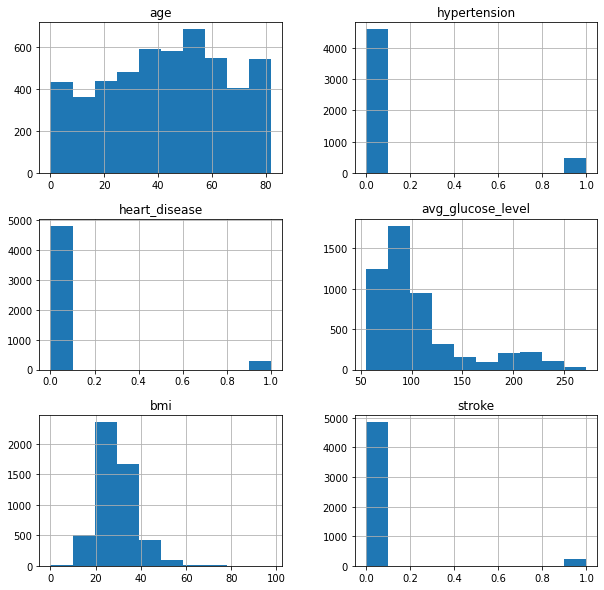

In [456]:
df.hist(figsize = (10,10))
plt.show()

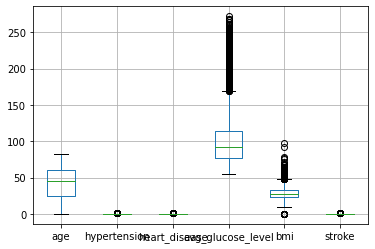

In [457]:
df.boxplot()
plt.show()

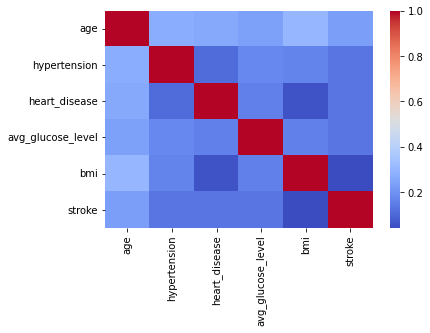

In [458]:
import seaborn as sns
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

Build Primary Model[Multiple Linear Regression]:

Seperating x train, x test, y train and y test using scikit-learn library.

In [459]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=5)

In [460]:
from sklearn.preprocessing import StandardScaler

# create an instance of StandardScaler
scaler = StandardScaler ()

# use the fitted scaler to transform both the training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [461]:
# initializing Matrices which act as an Container to hold our Data.
W = np.zeros(X_train.shape[1])
B = 0


In [462]:
def sigmoid_function(x, w, b):
    z = x.dot(w) + b
    z.shape
    return np.where(1/(1 + np.exp(-z)) > 0.5, 1, 0)
    


In [463]:
def cost_function(X, Y, W, B):
    Y_pred = sigmoid_function(X,W,B)
    epsilon = 1e-15
    # Calculate the log loss between the actual and predicted values
    loss = -np.mean(Y * np.log(Y_pred + epsilon) + (1 - Y) * np.log(1 - Y_pred + epsilon))
    return loss

In [464]:
inital_cost = cost_function(X_train, Y_train, np.array([0,0,0]),0)
print(inital_cost)


1.4991464387869906


In [465]:
print( X_train.shape)
print( X_test.shape)
print( Y_train.shape)
print( Y_test.shape)

(3548, 3)
(1521, 3)
(3548,)
(1521,)


In [466]:
def gradient_descent(X, Y, W, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        Y_pred = sigmoid_function(X,W,B)
        # Difference b/w Hypothesis and Actual Y
        loss = Y_pred - Y
        # Gradient Calculation
        dw = (X.T.dot(loss) ) / (m)
        db = np.sum(loss)/m
        # Changing Values of B using Gradient
        W = W - alpha * dw
        B = B - alpha * db
        # New Cost Value
        cost = cost_function(X, Y, W, B)
        cost_history[iteration] = cost
        
    return W, B, cost_history

In [467]:
 # Learning Rate:
alpha = 0.001

Stroke,new_bias, Updated_cost = gradient_descent(X_train, Y_train, W, B, alpha, 10000)
print(new_bias)
# New Values of
print(Stroke)

# Final Cost of our Iterations.
print(Updated_cost)

-0.0001820744081172498
[-1.45716469e-05  6.34362326e-05 -1.09170103e-04]
[23.314647538278205, 3.58237590567281, 1.4991464387869906, 1.4991464387869906, 1.4991464387869906, 1.4991464387869906, 1.8788004070512287, 1.7425143671615022, 2.015086446940955, 1.5867588930018148, 2.550495889364881, 1.4991464387869906, 3.17351778600363, 1.4991464387869906, 2.200046072505584, 1.4991464387869906, 4.4487657306860715, 1.4991464387869906, 1.4991464387869906, 2.336332112395311, 1.4894117216520104, 4.4487657306860715, 1.4991464387869906, 1.4991464387869906, 2.696516646389588, 1.4991464387869906, 3.3974162801081818, 1.508881155921971, 3.757600814102458, 1.5186158730569514, 2.151372486830682, 1.6451671958116976, 4.4195615792811305, 1.4991464387869906, 1.4991464387869906, 2.8230679691443346, 1.5088811559219713, 3.416885714378142, 1.508881155921971, 4.030172893881911, 1.6062283272717757, 2.3071279609903694, 1.5088811559219713, 4.5655823363058365, 1.4991464387869906, 2.7743943834694313, 1.4991464387869906, 1

In [468]:
y_pred = sigmoid_function(X_test,Stroke,new_bias)

In [469]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Model Evaluation:

In [471]:
correct_predictions = np.sum(Y_test == y_pred)
total_predictions = len(Y_test)

accuracy = correct_predictions / total_predictions
print("Accuracy: ", accuracy)

Accuracy:  0.948060486522025


In [472]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[1437,   21],
       [  58,    5]])

In [473]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(Y_test,y_pred)
ac

0.948060486522025

Dimensionality Reduction:

In [479]:
new_df = df.drop(["gender","hypertension","heart_disease","smoking_status","Residence_type","ever_married"], axis=1)


In [480]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_df)

# Compute the covariance matrix
cov_matrix = np.cov(data_scaled.T)

# Compute the eigenvectors and eigenvalues
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Select the principal components
pca = PCA(n_components=2)
pca.fit(data_scaled)

# Project the data onto the principal components
data_reduced = pca.transform(data_scaled)
print(data_reduced)

[[ 4.26069735 -3.17655706]
 [ 3.07171682 -3.44881437]
 [ 3.03226924 -3.35600981]
 ...
 [-0.45248323  0.27785361]
 [ 0.57860709 -0.06779459]
 [-0.43832118 -0.02878974]]


In [484]:
# Splitting the data into independent variale  as X  and dependent variables as the Y   
X1 = df[["bmi","age","avg_glucose_level"]]
Y1 = df["stroke"]

In [485]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X1,Y1,test_size=0.3, random_state=5)
# create an instance of StandardScaler
scaler = StandardScaler ()

# use the fitted scaler to transform both the training and test data
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [486]:
W1 = np.zeros(X_train.shape[1])
B1 = 0

In [487]:
inital_cost1 = cost_function(X_train1, Y_train1, np.array([0,0,0]),0)
print(inital_cost1)

1.4991464387869906


In [489]:
 # Learning Rate:
alpha1 = 0.001

Stroke1,new_bias1, Updated_cost1 = gradient_descent(X_train1, Y_train1, W1, B1, alpha1, 10000)
print(new_bias1)
# New Values of
print(Stroke1)

# Final Cost of our Iterations.
print(Updated_cost1[-1])

-0.0001820744081172498
[-1.45716469e-05  6.34362326e-05 -1.09170103e-04]
2.005351729805975


In [490]:
correct_predictions1 = np.sum(Y_test == y_pred)
total_predictions1 = len(Y_test)

accuracy1 = correct_predictions1 / total_predictions1
print("Accuracy: ", accuracy1)

Accuracy:  0.948060486522025
